# Introduction to machine learning: classification of basalt source

## Import scientific python libraries

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import copy

## Machine learning
Text from: https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.

Learning problems fall into a few categories:
- **supervised learning**, in which the data comes with additional attributes that we want to predict (Click here to go to the scikit-learn supervised learning page).This problem can be either:
    - *classification*: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.
    - *regression*: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

- **unsupervised learning**, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization (Click here to go to the Scikit-Learn unsupervised learning page).

### Training set and testing set

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.

**Today we will focus on classification through a supervised learning approach**

*Systems doing this type of analysis are all around us. Consider a spam filter for example*

# Classifying volcanic rocks

<img src="./images/volcanic-tectonics.png" width = 600 align = 'center'>

Today we are going to continue dealing with igneous geochemistry data. Igneous rocks are those that crystallize from cooling magma. Different magmas have different compositions associated with their origin as we explore two weeks ago. During class today, we will continue to focus on data from mafic lava flows (these are called basalts and are the relatively low silica, high iron end of what we looked at two weeks ago).

> Igneous rocks form in a wide variety of tectonic settings,
including mid-ocean ridges, ocean islands, and volcanic
arcs. It is a problem of great interest to igneous petrologists
to recover the original tectonic setting of mafic rocks of the
past. When the geological setting alone cannot unambiguously
resolve this question, the chemical composition of
these rocks might contain the answer. The major, minor,
and trace elemental composition of basalts shows large
variations, for example as a function of formation depth
(e.g., Kushiro and Kuno, 1963) --- *Vermeesch (2006)*

For this analysis we are going to use a dataset that was compiled in 

Vermeesch (2006) Tectonic discrimination of basalts with classification trees, *Geochimica et Cosmochimica Acta*  https://doi.org/10.1016/j.gca.2005.12.016

These data were grouped into 3 categories:

- 256 ***Island arc basalts (IAB)*** from the Aeolian, Izu-Bonin, Kermadec, Kurile, Lesser Antilles, Mariana, Scotia, and Tonga arcs.
- 241 ***Mid-ocean ridge (MORB)*** samples from the East Pacific Rise, Mid Atlantic Ridge, Indian Ocean, and Juan de Fuca Ridge.
- 259 ***Ocean-island (OIB)*** samples from St. Helena, the Canary, Cape Verde, Caroline, Crozet, Hawaii-Emperor, Juan Fernandez, Marquesas, Mascarene, Samoan, and Society islands.

**Let's look at the illustration above and determine where each of these settings are within a plate tectonic context**

## Import data


The data are from the supplemental materials of the Vermeesch (2006) paper. The samples are grouped by affinity MORB, OIB, and IAB. They are additionally assigned affinity codes and colors from the default matplotlib cycle:

|affinity| affinity code | color |
|--------|---------------|-------|
| MORB| 0 | C0
| OIB |  1 | C1
| IAB |  2 | C2

In [3]:
basalt_data = pd.read_csv('./data/Vermeesch2006.csv')
basalt_data.tail()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb
751,IAB,2,C2,50.97,0.78,18.86,NaN,NaN,10.85,4.71,0.16,0.60,2.38,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,34.0,152.0,NaN,NaN,7.5,371.0,19.3,56.0,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.82,15.556,38.389
752,IAB,2,C2,51.00,1.41,17.06,3.80,7.04,9.97,4.96,0.17,0.73,2.56,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,395.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70348,NaN,NaN,NaN
753,IAB,2,C2,52.56,1.21,17.74,2.28,7.53,10.48,5.57,0.24,0.29,2.27,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70362,NaN,NaN,NaN
754,IAB,2,C2,52.59,1.50,16.88,2.41,7.90,10.83,4.91,0.26,0.54,1.63,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70363,NaN,NaN,NaN
755,IAB,2,C2,52.96,1.27,15.65,2.91,9.32,9.78,4.24,0.23,0.46,2.54,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70352,NaN,NaN,NaN


In [4]:
MORB_data = basalt_data[basalt_data['affinity']=='MORB']
OIB_data = basalt_data[basalt_data['affinity']=='OIB']
IAB_data = basalt_data[basalt_data['affinity']=='IAB']

## Can geochemical data be used to classify the tectonic setting?

These data are labeled. The author already determined what setting these basalts came from. However, is there are way that we could use these labeled data to determine the setting for an unknown basalt?

A paper published in 1982 proposed that the elements titanium and vanadium were particular good at giving insight into tectonic setting. The details of why are quite complicated and can be summarized as "the depletion of V relative to Ti is a function of the fO2 of the magma and its source, the degree of partial melting, and subsequent fractional crystallization." If you take EPS100B you will learn more about the fundamentals behind this igneous petrology. *For the moment you can consider the working hypothesis behind this classification to that different magmatic environments have differences in oxidation states that are reflected in Ti vs V ratios.*

Shervais, J.W. (1982) Ti-V plots and the petrogenesis of modern and ophiolitic lavas *Earth and Planetary Science Letters* https://doi.org/10.1016/0012-821X(82)90120-0

### Plot TiO2 (wt%) vs V (ppm)

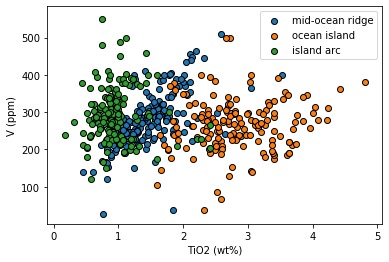

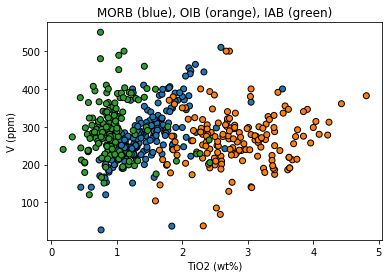

In [5]:
plt.scatter(MORB_data['TiO2 (wt%)'],MORB_data['V (ppm)'],label='mid-ocean ridge',edgecolors='black')
plt.scatter(OIB_data['TiO2 (wt%)'],OIB_data['V (ppm)'],label='ocean island',edgecolors='black')
plt.scatter(IAB_data['TiO2 (wt%)'],IAB_data['V (ppm)'],label='island arc',edgecolors='black')
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.legend()
plt.show()

scatter_plot = plt.scatter(basalt_data['TiO2 (wt%)'],basalt_data['V (ppm)'],color=basalt_data['color'],edgecolors='black')
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.title('MORB (blue), OIB (orange), IAB (green)')
plt.show()

### Use the pandas groupby function to group by affinity and describe the values of one column

In [6]:
basalt_data.groupby('affinity')['TiO2 (wt%)'].describe()

,count,mean,std,min,25%,50%,75%,max
affinity,,,,,,,,
IAB,229.0,0.965035,0.356350,0.18,0.78000,0.890,1.0700,2.70
MORB,230.0,1.469783,0.437550,0.45,1.16625,1.425,1.6975,3.53
OIB,210.0,2.907557,0.657444,1.51,2.46500,2.835,3.3275,4.81


**CODE FOR YOU TO WRITE: Use the groupby command and describe the grouped vanadium concentration for the data.**

*Can we different between the different affinities on vanadium concentration alone?*

## Eye test classification method

In order to classify the basalt into their affinity based on titanium and vanadium concentrations, we can use a classification method.

The goal here is to be able to make an inference of what environment an unknown basalt formed in based on comparison to these data.

Let's say that we have two points where there affinity is unknown.
- point 1 has TiO2 of 4% and V concentration of 300 ppm
- point 2 has TiO2 of 1% and V concentration of 350 ppm
- point 3 has TiO2 of 1.9% and V concentration of 200 ppm

**Let's take votes on how they should be classified**

***WRITE HOW YOU THINK THEY SHOULD BE CLASSIFIED HERE***

In [7]:
point_1_TiO2 = 4
point_1_V = 300
point_2_TiO2 = 1
point_2_V = 350
point_3_TiO2 = 1.9
point_3_V = 200

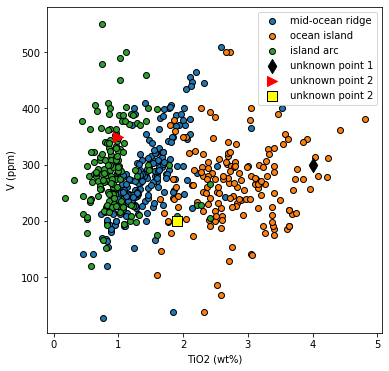

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(MORB_data['TiO2 (wt%)'],MORB_data['V (ppm)'],label='mid-ocean ridge',edgecolors='black')
plt.scatter(OIB_data['TiO2 (wt%)'],OIB_data['V (ppm)'],label='ocean island',edgecolors='black')
plt.scatter(IAB_data['TiO2 (wt%)'],IAB_data['V (ppm)'],label='island arc',edgecolors='black')
plt.scatter(point_1_TiO2,point_1_V,label='unknown point 1',color='black',marker='d',s=100)
plt.scatter(point_2_TiO2,point_2_V,label='unknown point 2',color='red',marker='>',s=100)
plt.scatter(point_3_TiO2,point_3_V,label='unknown point 2',color='yellow',edgecolors='black',marker='s',s=100)
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.legend()
plt.show()

## Nearest Neighbors Classification

In nearest neighbors classification, classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point. There are different ways this can be done and can be weighted.

### Filter the data to ones that have Ti and V data

In [9]:
basalt_data_Ti_V = basalt_data[(~basalt_data['TiO2 (wt%)'].isna()) & (~basalt_data['V (ppm)'].isna())]

### Normalize the data

Given that the nearest neighbor is a distance and that they y-axis and x-axis are so different (in part because of different units) we need to normalize the data. We will divide the 'TiO2 (wt%)' by the maximum 'TiO2 (wt%)' to get a value between 0 and 1. We will do the same for V (ppm) as well.

In [10]:
basalt_data_Ti_V.loc[:,'Ti_norm'] = basalt_data['TiO2 (wt%)']/np.max(basalt_data['TiO2 (wt%)'])
basalt_data_Ti_V.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Ti_norm
0,MORB,0,C0,48.200,2.520,15.20,2.31,8.56,9.69,7.150,0.170,0.900,3.790,0.44,18.48,41.19,NaN,NaN,6.67,2.02,NaN,1.17,NaN,NaN,NaN,NaN,3.68,0.54,28.80,297.0,196.0,43.00,113.00,44.00,97.00,NaN,13.09,342.0,NaN,289.0,NaN,NaN,NaN,NaN,5.20,NaN,2.150,1.4881,0.4941,NaN,0.703000,NaN,NaN,NaN,0.523909
1,MORB,0,C0,49.580,1.165,17.82,9.31,NaN,11.87,7.130,0.155,0.070,2.730,0.10,2.42,7.84,1.34,7.49,2.63,0.96,3.53,0.67,4.52,0.95,2.90,0.42,2.86,0.45,32.71,229.4,315.5,39.96,122.20,62.62,64.85,15.20,0.89,119.3,28.29,72.0,1.83,NaN,0.016,9.54,1.98,0.128,0.386,0.1170,0.0350,0.513152,0.702496,18.439,15.489,37.878,0.242204
2,MORB,0,C0,49.890,1.670,16.16,10.74,NaN,11.05,6.960,0.180,0.190,2.890,0.16,3.98,12.08,2.05,11.16,3.81,1.35,5.06,0.90,6.03,1.27,3.77,0.60,3.80,0.60,38.43,296.6,224.0,40.60,82.27,64.28,83.26,16.28,1.55,130.2,38.52,117.7,3.25,NaN,0.029,14.15,3.13,0.216,0.638,0.2240,0.1000,0.513134,0.702518,18.504,15.494,37.920,0.347193
3,MORB,0,C0,50.170,1.565,16.58,9.92,NaN,11.40,7.120,0.165,0.265,2.860,0.16,4.08,12.59,2.01,10.98,3.63,1.32,4.79,0.96,5.80,1.26,3.56,0.56,3.62,0.51,35.06,279.2,266.7,40.87,111.81,64.28,75.67,15.85,2.48,130.4,35.74,114.1,3.45,NaN,0.034,15.77,2.95,0.205,0.535,0.2010,0.2710,0.513155,0.702505,18.426,15.466,37.828,0.325364
4,MORB,0,C0,50.325,1.630,15.46,10.71,NaN,10.79,7.655,0.180,0.130,3.125,0.16,4.20,13.19,2.08,11.40,3.61,1.31,4.77,0.89,5.74,1.21,3.50,0.52,3.47,0.54,39.00,301.4,282.6,46.89,116.33,65.85,77.92,15.49,1.45,140.7,36.26,116.6,3.28,NaN,0.022,14.94,2.91,0.202,0.604,0.2160,0.0700,0.513147,0.702517,18.438,15.487,37.865,0.338877


**Code for you to write**

Make a column called V_norm that is normalized vanadium.

In [11]:
### INSTRUCTOR VERSION
basalt_data_Ti_V.loc[:,'V_norm'] = basalt_data['V (ppm)']/np.max(basalt_data['V (ppm)'])

**Code for you to write**

Make a scatter plot of Ti_norm vs V_norm that is colored by affinity (`color=basalt_data_Ti_V['color']`). It should look a lot like the previous scatter plots.

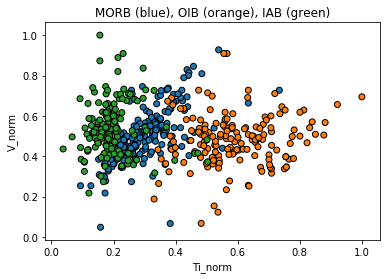

In [12]:
### INSTRUCTOR VERSION
scatter_plot = plt.scatter(basalt_data_Ti_V['Ti_norm'],basalt_data_Ti_V['V_norm'],color=basalt_data_Ti_V['color'],edgecolors='black')
plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.title('MORB (blue), OIB (orange), IAB (green)')
plt.show()

### Preparing arrays of the data

We will make a 2 x n array of the TiO2 (wt%) and V (ppm) values (where n is the number of data points) and a 1 x n array of the classifications (the tectonic affinities).

In [13]:
basalt_Ti_V = basalt_data_Ti_V[['Ti_norm', 'V_norm']].values
basalt_Ti_V

array([[0.52390852, 0.54      ],
       [0.24220374, 0.41709091],
       [0.34719335, 0.53927273],
       ...,
       [0.17671518, 0.61636364],
       [0.17463617, 0.54363636],
       [0.15800416, 0.49636364]])

In [14]:
basalt_affinity = basalt_data_Ti_V['affinity'].tolist()
basalt_affinity_code = basalt_data_Ti_V['affinity code'].tolist()

### Import sci-kit learn 

We will be using the scikit-learn library which is a widely used library for machine learning in Python.

In [15]:
from sklearn import neighbors

### Define our classifier

We will construct a classifier that uses the 5 nearest neighbors (`n_neighbors=5`) and weight points by the inverse of their distance (`weights='distance'`) such that closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [16]:
classifier_neighbors = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')

### Fit/train the classifier

We can then feed the array of the data and the array of the classification in a `.fit` function preformed on the classifier object.

In [17]:
classifier_neighbors.fit(basalt_Ti_V, basalt_affinity)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

### Normalize our mystery points

In [18]:
point_1_TiO2_norm = 4/np.max(basalt_data['TiO2 (wt%)'])
point_1_V_norm = 300/np.max(basalt_data['V (ppm)'])
point_2_TiO2_norm = 1/np.max(basalt_data['TiO2 (wt%)'])
point_2_V_norm = 350/np.max(basalt_data['V (ppm)'])
point_3_TiO2_norm = 1.9/np.max(basalt_data['TiO2 (wt%)'])
point_3_V_norm = 200/np.max(basalt_data['V (ppm)'])

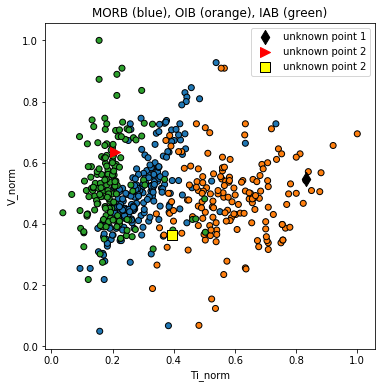

In [19]:
plt.figure(figsize=(6,6))
scatter_plot = plt.scatter(basalt_data_Ti_V['Ti_norm'],basalt_data_Ti_V['V_norm'],color=basalt_data_Ti_V['color'],edgecolors='black')
plt.scatter(point_1_TiO2_norm,point_1_V_norm,label='unknown point 1',color='black',marker='d',s=100)
plt.scatter(point_2_TiO2_norm,point_2_V_norm,label='unknown point 2',color='red',marker='>',s=100)
plt.scatter(point_3_TiO2_norm,point_3_V_norm,label='unknown point 2',color='yellow',edgecolors='black',marker='s',s=100)
plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.gca().set_aspect('equal', 'box')
plt.title('MORB (blue), OIB (orange), IAB (green)')
plt.legend()
plt.show()

### Predict the tectonic affinity of the mystery points using the neighbors classifier

In [20]:
classifier_neighbors.predict([[point_1_TiO2_norm,point_1_V_norm],
                             [point_2_TiO2_norm,point_2_V_norm],
                             [point_3_TiO2_norm,point_3_V_norm]])

array(['OIB', 'IAB', 'OIB'], dtype='<U4')

### Fit/train using the basalt_affinity_code rather than the string names

In [21]:
classifier_neighbors.fit(basalt_Ti_V, basalt_affinity_code)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [22]:
classifier_neighbors.predict([[point_1_TiO2_norm,point_1_V_norm],
                    [point_2_TiO2_norm,point_2_V_norm],
                    [point_3_TiO2_norm,point_3_V_norm]])

array([1, 2, 1])

### Visualizing the decision boundary

Let's make a 101 x 101 grid of x and y values between 0 and 1.

In [23]:
xx, yy = np.meshgrid(np.linspace(0, 1, 101),
                     np.linspace(0, 1, 101))
grid = np.c_[xx.ravel(), yy.ravel()]

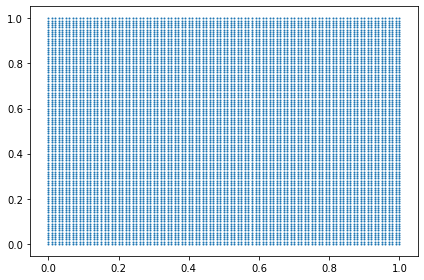

In [24]:
plt.scatter(xx, yy, s=1)
plt.tight_layout()

### Classify the grid

In [25]:
grid_classes = classifier_neighbors.predict(grid)
grid_classes

array([0, 0, 0, ..., 1, 1, 1])

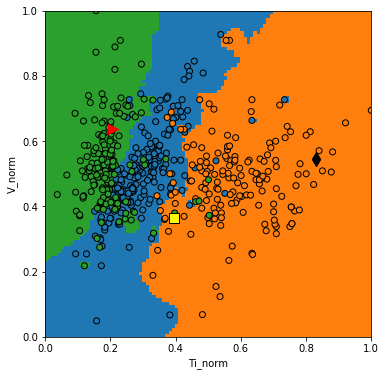

In [26]:
cmap = ListedColormap(['C0', 'C1', 'C2'])
grid_classes = grid_classes.reshape(xx.shape)

plt.figure(figsize=(6,6))

plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)
scatter_plot = plt.scatter(basalt_data_Ti_V['Ti_norm'],basalt_data_Ti_V['V_norm'],
                           color=basalt_data_Ti_V['color'],edgecolors='black')

plt.scatter(point_1_TiO2_norm,point_1_V_norm,label='unknown point 1',color='black',marker='d',s=100)
plt.scatter(point_2_TiO2_norm,point_2_V_norm,label='unknown point 2',color='red',marker='>',s=100)
plt.scatter(point_3_TiO2_norm,point_3_V_norm,label='unknown point 2',color='yellow',edgecolors='black',marker='s',s=100)

plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', 'box')
plt.show()

## Training and testing

How good is our nearest neighbor classifier? To answer this we'll need to find out how frequently our classifications are correct.

**Discussion question**

*How should be determine the accuracy of this classification scheme using the data that we already have?*

In [27]:
len(basalt_data_Ti_V)

514

### Making a training and testing data set

There are 514 rows with data. Let's use a random half of them for training and the other half for testing. To do this, we'll shuffle all the rows, take the first 257 as the training set, and the remaining 257 for testing.

In [28]:
# Make a randomly ordered dataframe from the initial one
randomized_basalt_data = basalt_data_Ti_V.sample(frac=1) 

# Take the first 257 data points to use for "training"
training_data = copy.deepcopy(randomized_basalt_data.iloc[0:257])

# Use the rest to apply our machine learning on
remaining_data = copy.deepcopy(randomized_basalt_data.iloc[257:])

In [29]:
basalt_Ti_V_training = training_data[['Ti_norm', 'V_norm']].values
basalt_Ti_V_remaining = remaining_data[['Ti_norm', 'V_norm']].values
basalt_affinity_training = training_data['affinity code'].tolist()

In [30]:
classifier_neighbors.fit(basalt_Ti_V_training, basalt_affinity_training)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

### Visualize the classification regions fit with half the data

We can send the grid to the classifier to see the classification regions and decision boundary that has been fit with half of the data.

In [31]:
grid_classes = classifier_neighbors.predict(grid)
grid_classes = grid_classes.reshape(xx.shape)

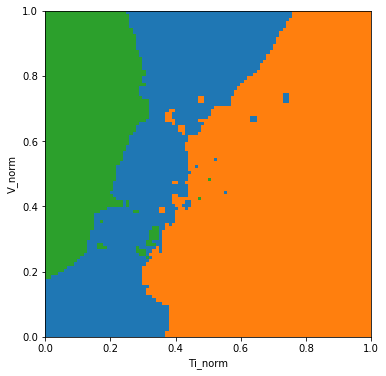

In [32]:
plt.figure(figsize=(6,6))
plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)
plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', 'box')
plt.show()

### Compare the remaining data (test data) to the classification regions

Place the test data on this graph and you can see at once that while the classifier got many of the points right, there are some mis-classified points.

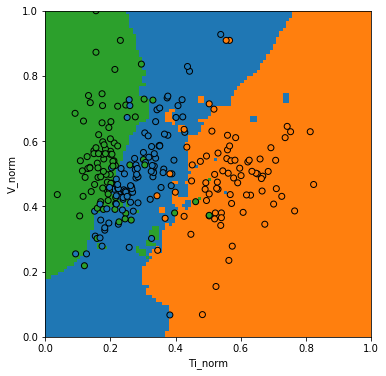

In [33]:
plt.figure(figsize=(6,6))
plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)

plt.scatter(remaining_data['Ti_norm'],remaining_data['V_norm'],
                           color=remaining_data['color'],edgecolors='black')

plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', 'box')
plt.show()

### Estimating the accuracy of the classifier

Since the test set was chosen randomly from the original sample it should preform with similar accuracy on the overall population. Let's calculate the success rate of the classification.

We will input the remaining data (test data) to the classifier and then assign these classified affinities to a new column in pandas.

In [34]:
remaining_classes = classifier_neighbors.predict(basalt_Ti_V_remaining)

In [35]:
remaining_data['predicted_class'] = remaining_classes

In [36]:
remaining_data.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Ti_norm,V_norm,predicted_class
148,MORB,0,C0,50.75,1.220,15.64,1.08,7.58,11.19,9.11,0.150,0.100,2.79,0.130,2.80,9.10,NaN,8.50,2.90,1.00,NaN,0.70,NaN,NaN,NaN,0.45,2.90,0.42,35.0,246.0,381.0,42.0,172.0,NaN,NaN,NaN,1.09,111.0,NaN,NaN,NaN,NaN,0.014,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0.702330,NaN,NaN,NaN,0.253638,0.447273,0
619,IAB,2,C2,52.60,0.865,14.04,9.87,NaN,9.14,8.44,0.163,0.836,4.05,0.073,1.80,4.98,NaN,4.51,1.55,0.63,2.28,0.41,NaN,NaN,NaN,0.27,1.62,0.28,48.8,300.0,400.0,NaN,121.0,NaN,NaN,11.0,46.80,194.0,18.6,42.0,3.1,NaN,NaN,185.0,NaN,NaN,NaN,NaN,NaN,0.513007,0.706937,NaN,NaN,NaN,0.179834,0.545455,2
33,MORB,0,C0,48.20,1.860,16.20,NaN,NaN,10.57,9.08,0.160,0.380,3.10,0.280,9.46,24.90,NaN,NaN,4.79,1.46,NaN,0.86,NaN,NaN,NaN,NaN,3.12,0.47,32.3,255.0,349.0,70.0,142.0,60.0,78.0,NaN,6.90,223.0,NaN,NaN,NaN,NaN,NaN,103.0,4.0,NaN,NaN,NaN,0.228,NaN,0.702870,NaN,NaN,NaN,0.386694,0.463636,0
42,MORB,0,C0,49.11,1.750,13.44,12.27,NaN,11.29,8.95,0.200,0.430,2.23,0.200,11.90,31.00,NaN,18.60,4.50,1.46,5.20,0.88,NaN,NaN,NaN,0.59,3.50,0.48,38.0,283.0,393.0,42.0,136.0,NaN,NaN,NaN,9.00,155.0,26.0,137.0,20.0,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,0.702520,NaN,NaN,NaN,0.363825,0.514545,0
408,OIB,1,C1,49.34,2.500,13.44,2.32,8.49,9.18,9.32,0.140,0.670,3.17,0.290,23.00,33.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.0,483.0,41.0,267.0,72.0,NaN,NaN,18.00,407.0,20.0,178.0,30.0,NaN,NaN,275.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.519751,0.498182,1


Now we have a new column of the classified affinities for the test data. We also have the actually affinities given that the data were originally labeled with classifications.

In [37]:
remaining_data['correct_assignment'] = remaining_data['predicted_class'].eq(remaining_data['affinity code'])
remaining_data.head()

,affinity,affinity code,color,SiO2 (wt%),TiO2 (wt%),Al2O3 (wt%),Fe2O3 (wt%),FeO (wt%),CaO (wt%),MgO (wt%),MnO (wt%),K2O (wt%),Na2O (wt%),P2O5(wt%),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Sc (ppm),V (ppm),Cr (ppm),Co (ppm),Ni (ppm),Cu (ppm),Zn (ppm),Ga (ppm),Rb (ppm),Sr (ppm),Y (ppm),Zr (ppm),Nb (ppm),Sn (ppm),Cs (ppm),Ba (ppm),Hf (ppm),Ta (ppm),Pb (ppm),Th (ppm),U (ppm),143Nd/144Nd,87Sr/86Sr,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Ti_norm,V_norm,predicted_class,correct_assignment
148,MORB,0,C0,50.75,1.220,15.64,1.08,7.58,11.19,9.11,0.150,0.100,2.79,0.130,2.80,9.10,NaN,8.50,2.90,1.00,NaN,0.70,NaN,NaN,NaN,0.45,2.90,0.42,35.0,246.0,381.0,42.0,172.0,NaN,NaN,NaN,1.09,111.0,NaN,NaN,NaN,NaN,0.014,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0.702330,NaN,NaN,NaN,0.253638,0.447273,0,True
619,IAB,2,C2,52.60,0.865,14.04,9.87,NaN,9.14,8.44,0.163,0.836,4.05,0.073,1.80,4.98,NaN,4.51,1.55,0.63,2.28,0.41,NaN,NaN,NaN,0.27,1.62,0.28,48.8,300.0,400.0,NaN,121.0,NaN,NaN,11.0,46.80,194.0,18.6,42.0,3.1,NaN,NaN,185.0,NaN,NaN,NaN,NaN,NaN,0.513007,0.706937,NaN,NaN,NaN,0.179834,0.545455,2,True
33,MORB,0,C0,48.20,1.860,16.20,NaN,NaN,10.57,9.08,0.160,0.380,3.10,0.280,9.46,24.90,NaN,NaN,4.79,1.46,NaN,0.86,NaN,NaN,NaN,NaN,3.12,0.47,32.3,255.0,349.0,70.0,142.0,60.0,78.0,NaN,6.90,223.0,NaN,NaN,NaN,NaN,NaN,103.0,4.0,NaN,NaN,NaN,0.228,NaN,0.702870,NaN,NaN,NaN,0.386694,0.463636,0,True
42,MORB,0,C0,49.11,1.750,13.44,12.27,NaN,11.29,8.95,0.200,0.430,2.23,0.200,11.90,31.00,NaN,18.60,4.50,1.46,5.20,0.88,NaN,NaN,NaN,0.59,3.50,0.48,38.0,283.0,393.0,42.0,136.0,NaN,NaN,NaN,9.00,155.0,26.0,137.0,20.0,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,0.702520,NaN,NaN,NaN,0.363825,0.514545,0,True
408,OIB,1,C1,49.34,2.500,13.44,2.32,8.49,9.18,9.32,0.140,0.670,3.17,0.290,23.00,33.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.0,483.0,41.0,267.0,72.0,NaN,NaN,18.00,407.0,20.0,178.0,30.0,NaN,NaN,275.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.519751,0.498182,1,True


In [38]:
remaining_data['correct_assignment'].value_counts(normalize=True) * 100

True     84.435798
False    15.564202
Name: correct_assignment, dtype: float64

### Using scikit-learn functions to get an accuracy score of this nearest neighbor approach

Given that this approach of randomly splitting the data into training and test groups is quite common in macine learning classification, there are built-in convenience functions that can be used to more compactly do the same operations that we did above.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(basalt_Ti_V, basalt_affinity_code,train_size=0.5)

# fit the model on one set of data
classifier_neighbors.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = classifier_neighbors.predict(X2)
accuracy_score(y2, y2_model)

0.8482490272373541

## Other classification algorithms

If you go to the scikit-learn homepage you will find many available classifiers: https://scikit-learn.org/stable/index.html. They are nicely illustrated in this code from the scikit-learn documentation.

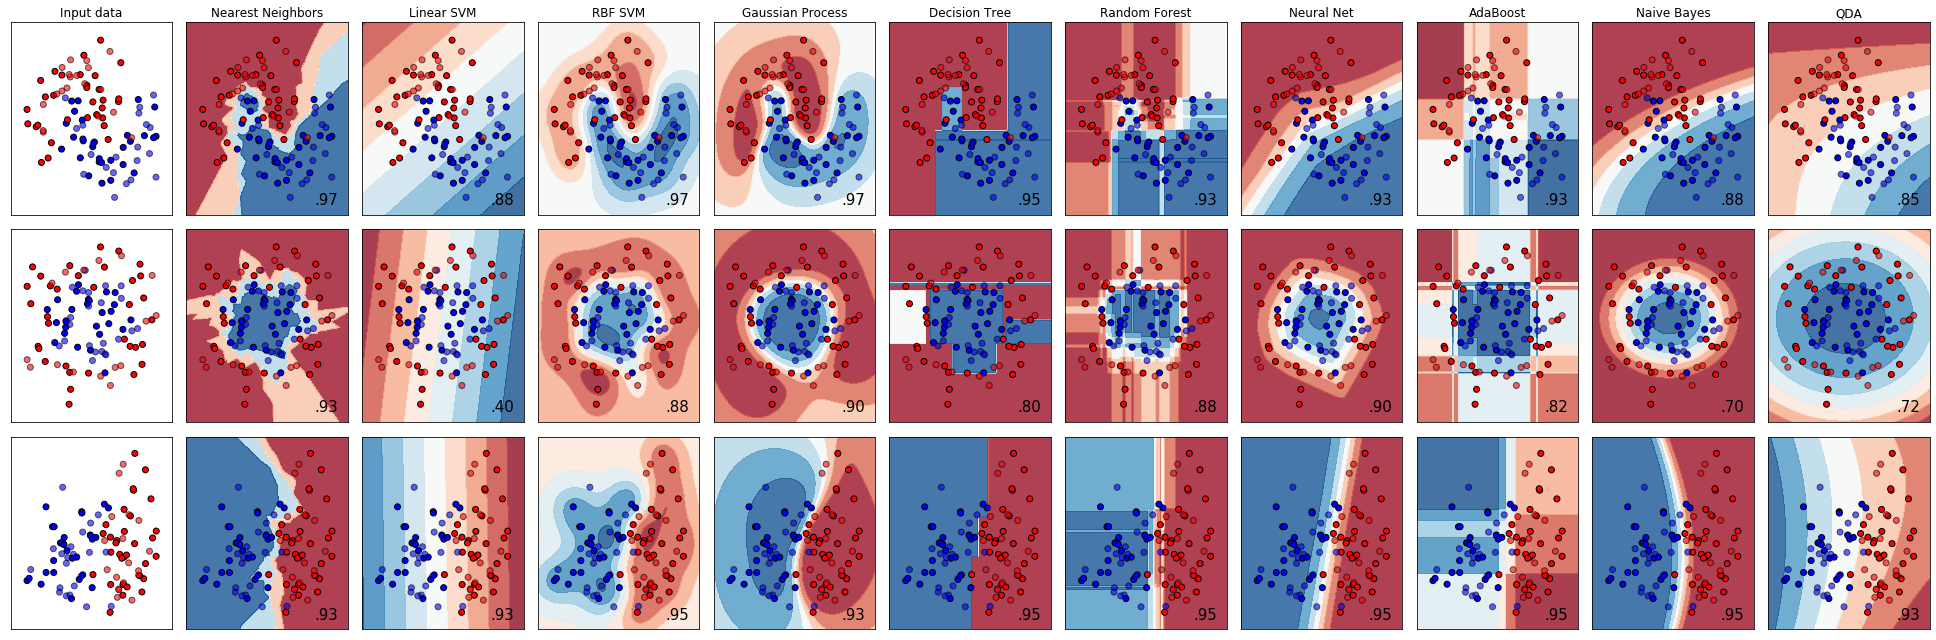

In [40]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

As a word of warning, we shouldn't get too carried away. Clearly, there are complexities related to this approach (our accuracy scores aren't that high). Shervais notes that: 
> "More specific evaluation of the tectonic setting of these and other ophiolites requires
application of detailed geologic and petrologic data as well as geochemistry. The Ti/V discrimination diagram, however,
is a potentially powerful adjunct to these techniques."

Additionally, we would like to be able to assign physical processes to the classification.

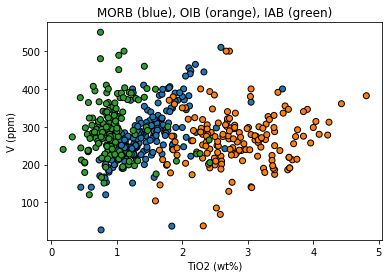

In [41]:
scatter_plot = plt.scatter(basalt_data['TiO2 (wt%)'],basalt_data['V (ppm)'],color=basalt_data['color'],edgecolors='black')
plt.xlabel('TiO2 (wt%)')
plt.ylabel('V (ppm)')
plt.title('MORB (blue), OIB (orange), IAB (green)')
plt.show()

## Implementing a linear classifier

Rather than using a nearest neighbor approach we could instead implement hard cut offs as lines using a linear classifier. A benefit of using such a classifier is that the data do not need to be normalized between 0 and 1. Instead, the actual values can be used.

In [42]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel="poly",degree=1)

In [44]:
basalt_Ti_V_unnorm = basalt_data_Ti_V[['TiO2 (wt%)','V (ppm)']].values
basalt_affinity = basalt_data_Ti_V['affinity'].tolist()
basalt_affinity_code = basalt_data_Ti_V['affinity code'].tolist()

**Code for you to write: implement the classifier_svc and determine its accuracy using a training set and a test set**

In [45]:
classifier_svc.fit(basalt_Ti_V_unnorm, basalt_affinity_code)

/Users/Laurentia/opt/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(basalt_Ti_V_unnorm, basalt_affinity_code,train_size=0.5)

# fit the model on one set of data
classifier_svc.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = classifier_svc.predict(X2)
accuracy_score(y2, y2_model)

/Users/Laurentia/opt/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8132295719844358

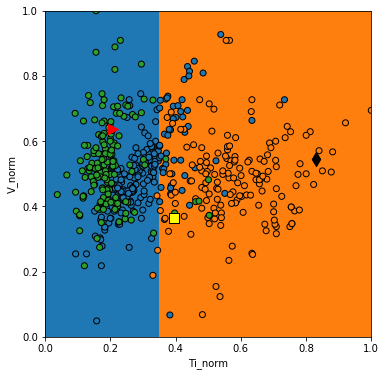

In [47]:
xx, yy = np.meshgrid(np.linspace(0, 5, 101),
                     np.linspace(0, 500, 101))
grid = np.c_[xx.ravel(), yy.ravel()]

grid_classes = classifier_svc.predict(grid)
grid_classes = grid_classes.reshape(xx.shape)

cmap = ListedColormap(['C0', 'C1', 'C2'])
grid_classes = grid_classes.reshape(xx.shape)

plt.figure(figsize=(6,6))

plt.pcolormesh(xx, yy, grid_classes, cmap=cmap)
scatter_plot = plt.scatter(basalt_data_Ti_V['Ti_norm'],basalt_data_Ti_V['V_norm'],
                           color=basalt_data_Ti_V['color'],edgecolors='black')

plt.xlabel('Ti_norm')
plt.ylabel('V_norm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', 'box')
plt.show()

**Code for you to write: pass a grid to the classifier and plot with the data**

We will want to use a grid that is spaced according to the non-normalized data.

In [ ]:
xx, yy = np.meshgrid(np.linspace(0, 5, 101),
                     np.linspace(0, 600, 101))
grid = np.c_[xx.ravel(), yy.ravel()]